# Story from environmental perspective

In [13]:
%run set_theme.ipynb

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

In [15]:
train_df = pd.read_csv('../data/train.csv')
cities_df = pd.read_csv('../data/worldcities.csv')
healthy_lifestyle_df = pd.read_csv('../data/healthy_lifestyle_city_2021.csv')

In [16]:
european_cities = [
    "London",
    "Paris",
    "Berlin",
    "Amsterdam",
    "Barcelona",
    "Lisbon",
    "Rome",
    "Athens",
    "Vienna",
    "Dublin",
    "Copenhagen",
    "Stockholm",
    "Oslo",
    "Helsinki",
    "Prague",
    "Budapest",
    "Warsaw",
    "Sofia",
    "Belgrade",
]

## Clean cities

The environmental quality of a city also tends to be a great factor when it comes to the overall well-being of its inhabitants. Wealthier cities are more likely to investment in green spaces, clean air, and waste management to improve the physical environment, leading to better health and a more pleasant living experience. For instance, well-maintained parks and recreational areas provide residents with spaces to exercise, relax, and connect with nature, which are crucial for mental well-being. 
The extent of greenspace within a city is a clear and measurable indicator of its commitment to sustainability. Cities that prioritize and invest in greenspaces demonstrate a dedication to environmental stewardship, public health, and long-term resilience, ensuring a high quality of life for their residents and future generations. Therefore we took this as an indicator, to counter the happiness scores of the European cities.

In [17]:
renamed_train_df = train_df.rename(columns={'City': 'city'})

merged_latlong_train = pd.merge(cities_df, renamed_train_df, on='city')

df_to_use = merged_latlong_train.dropna(subset=['lat', 'lng', 'Green_Space_Area'])

df_to_use['Happiness_Score'] = pd.to_numeric(df_to_use['Happiness_Score'])

filtered_df_to_use = df_to_use[df_to_use['Happiness_Score'] > -10]
filtered_df_to_use = filtered_df_to_use[filtered_df_to_use['city'].isin(european_cities)]
filtered_df_to_use = filtered_df_to_use[filtered_df_to_use['lng'] > -10]

fig_map = px.scatter_mapbox(
    filtered_df_to_use,
    lat='lat',
    lon='lng',
    hover_name='city',
    hover_data={'Green_Space_Area': True, 'Happiness_Score': True},
    size='Green_Space_Area',
    color='Happiness_Score',
    labels={'Happiness_Score': 'Happiness Score'},
    color_continuous_scale=px.colors.sequential.Plotly3,
    title='Greenspace Area and Happiness Score by City',
    zoom=1,
    
)

fig_map.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=2.3,
    margin={"t":40, "l":10,"b":40}
)

fig_map.add_annotation(
                    x=0, y=-0.07,
                    xref='paper',
                    yref='paper',
                    showarrow=False,
                    xanchor='left',
                    yanchor='bottom',
                    align='left',
                    text='The size of the bubble corresponds to the Greenspace area of that city', 
)

fig_map.show()

In the graph above you can clearly see a correlation between higher happiness scores and greater access to greenspaces. Cities like Copenhagen, Stockholm, Oslo, and Helsinki, known for abundant greenspaces (displayed by the sizes of the dots), display pink dots and score between 8 to 8.5. This suggests that greenspaces contribute positively to residents' well-being. This correlation underscores the importance of integrating greenspaces into urban planning to enhance the overall quality of life in cities in Europe. It highlights the role of environmental policy in promoting happier urban environments where residents can thrive.

In environmentally friendly countries, air quality tends to be higher due to several factors. These countries implement strict environmental regulations that control emissions from industrial activities, vehicles, and other pollution sources, reducing the levels of harmful pollutants in the air. The usage of clean energy sources such as wind, solar, and hydroelectric power minimizes reliance on fossil fuels, thereby lowering emissions of pollutants. Additionally, sustainable transportation options, including electric vehicles, public transportation, cycling, and walking, are promoted, reducing the number of traditional gasoline and diesel vehicles on the road. For these reasons, we chose to include air quality in our data story.

In [18]:
train_europe_df = train_df[train_df['City'].isin(european_cities)]

cities = train_europe_df['City']
air_quality_index = train_europe_df['Air_Quality_Index']
happiness_score = train_europe_df['Happiness_Score']

# Create traces for the bar chart
trace1 = go.Bar(
    x=cities,
    y=happiness_score,
    name='Happiness Score',
    yaxis='y1',
    offsetgroup=1,
    marker=dict(color='#F280F7')
)

trace2 = go.Bar(
    x=cities,
    y=(100 - air_quality_index),
    name='Air Quality Index',
    yaxis='y2',
    offsetgroup=2,
    marker=dict(color='#4c75eb')
)

# Create the layout with two y-axes
layout = go.Layout(
    title='Happiness Score and Air Quality Index by City',
    yaxis=dict(
        title='Happiness Score',
        titlefont=dict(color='#F280F7'),
        tickfont=dict(color='#F280F7'),
        range=[2, max(happiness_score)]
    ),
    yaxis2=dict(
        title='Air Quality Index',
        titlefont=dict(color='#4c75eb'),
        tickfont=dict(color='#4c75eb'),
        overlaying='y',
        side='right',
        showgrid=False,
    ),
    xaxis=dict(
        title='City'
    ),
    barmode='group'
)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()

People in cities that have better air quality tend to be a lot happier, as can be seen in the given graph. The correlation between high air quality and elevated happiness levels suggests that living in a clean, healthy environment significantly contributes to overall well-being. The positive impact of high air quality extends beyond physical health to mental well-being and overall life satisfaction. Clean air reduces the risk of contracting health problems including cardiovascular diseases. This contributes to a higher quality of life and increased happiness.

/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_18737/1391338323.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



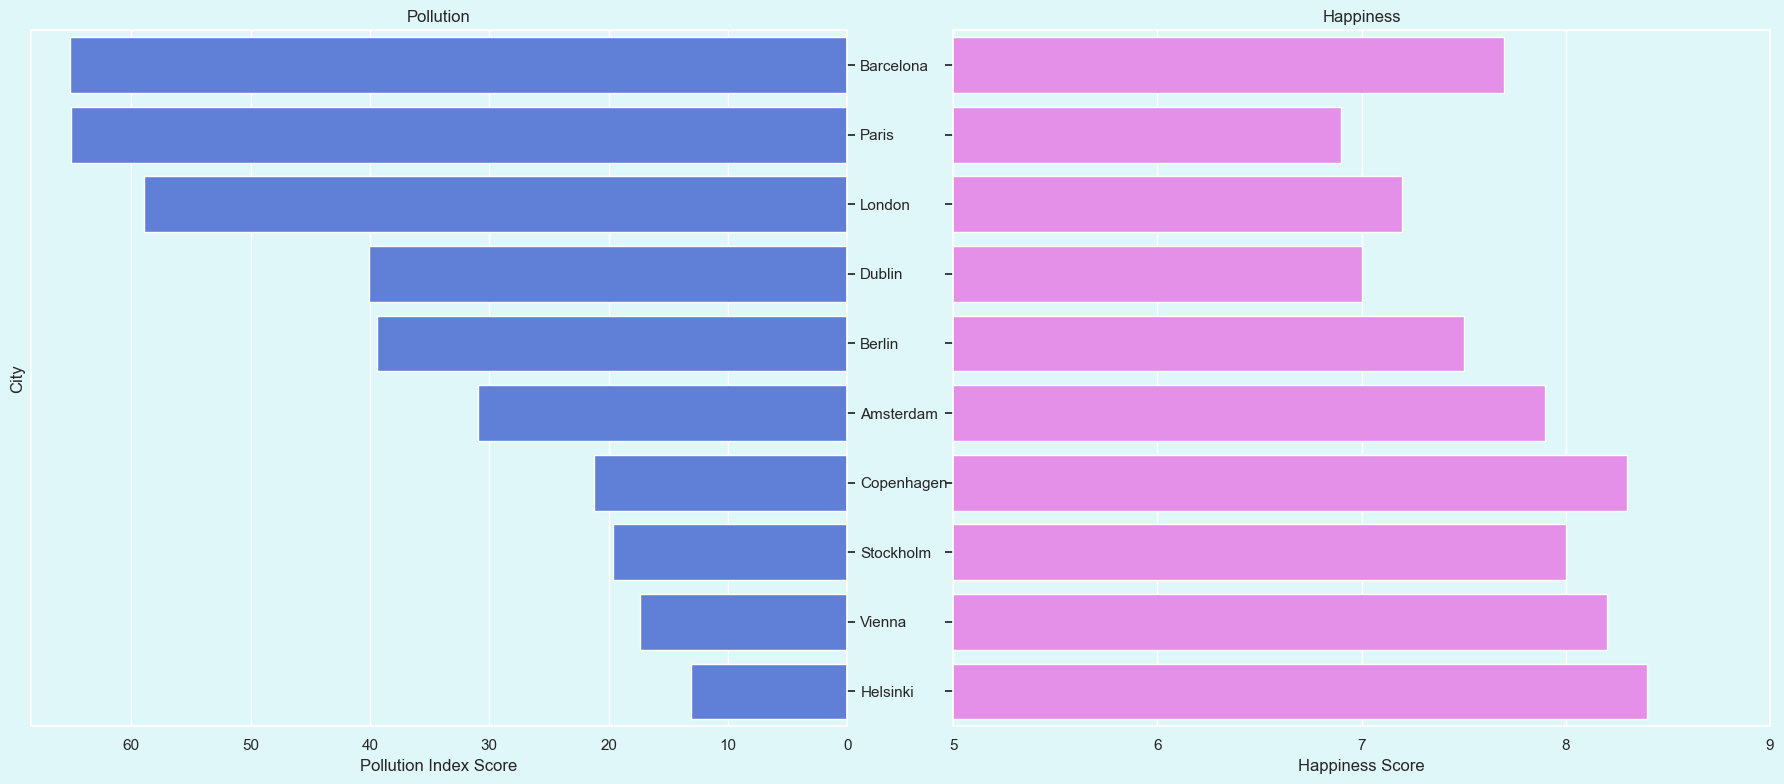

In [20]:
merged_train_healthy_lifestyle_df = pd.merge(train_df, healthy_lifestyle_df, on='City')

merged_train_healthy_lifestyle_filtered_df = merged_train_healthy_lifestyle_df[merged_train_healthy_lifestyle_df['City'].isin(european_cities)]

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(18, 8))

sns.set_theme(rc={'axes.facecolor': '#E0F7FA', 'figure.facecolor': '#E0F7FA'})

merged_train_healthy_lifestyle_filtered_df.sort_values(by='Pollution(Index score) (City)', ascending=False, inplace=True)

sns.barplot(x=pd.to_numeric(merged_train_healthy_lifestyle_filtered_df['Pollution(Index score) (City)']), y='City', data=merged_train_healthy_lifestyle_filtered_df, ax=axes[0], color='#4c75eb')
sns.barplot(x=pd.to_numeric(merged_train_healthy_lifestyle_filtered_df['Happiness_Score']), y='City', data=merged_train_healthy_lifestyle_filtered_df, ax=axes[1], color='#F280F7')

axes[0].set(title='Pollution')
axes[0].set_xlabel('Pollution Index Score')
axes[1].set(title='Happiness')
axes[1].set_xlabel('Happiness Score')

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()

axes[1].yaxis.tick_left()

axes[1].set_xlim(5, 9)
axes[1].set_xticks(range(5, 10, 1))

fig.tight_layout()
fig.subplots_adjust(wspace=0.13)

fig.set_facecolor('#E0F7FA')

plt.show()

## Summary
Cities today are located at the core of quality of life. The two most central influences that this study explored are economic factors and the sustainability of cities. We conducted detailed data analyses for a number of conflicting factors related to the well-being of urban residents. Graphs on safety vs. economic conditions, healthcare vs. economic conditions, education scores vs. economic conditions. Furthermore, we probe how pollution goes with happiness, and green space area vs. happiness provided standards within these complex relationships.
Our results show that well-being is economically linked to income levels and the availability of jobs, but sustainability features—like air quality and green spaces—are very prominent. There are, however, significant discrepancies between cities that point out potentials for improvements that will require targeted policies. Further research effort is needed with enlarged data sets to understand comprehensively the dynamics of these drivers and how to set up strategies for improving livability in cities and fostering sustainable development.

## References
1. Xu, J., Liu, N., Polemiti, E., Garcia-Mondragon, L., Tang, J., Liu, X., Lett, T., Yu, L., Nöthen, M. M., Feng, J., Yu, C., Marquand, A., Schumann, G., Walter, H., Heinz, A., Ralser, M., Twardziok, S., Vaidya, N., Serin, E., . . . Ogoh, G. (2023). Effects of urban living environments on mental health in adults. Nature Medicine, 29(6), 1456–1467. https://doi.org/10.1038/s41591-023-02365-w

2. Livingston, V., Jackson-Nevels, B., & Reddy, V. V. (2022). Social, cultural, and economic determinants of Well-Being. Encyclopedia, 2(3), 1183–1199. https://doi.org/10.3390/encyclopedia2030079   
																		 
3. City Happiness Index - 2024. (2024, January 22). Kaggle. https://www.kaggle.com/datasets/emirhanai/city-happiness-index-2024
